# USAD

## Environment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

from utils import *
from usad import *

In [2]:
!nvidia-smi -L

device = get_default_device()

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


## EDA - Data Pre-Processing

### Load dataset

In [3]:
file = "SCADA_Station1_11042_10000_label_statistical_20_1"
dataset = pd.read_csv(f'data/{file}.csv')

dataset.head(2)

,Value_mean,Value_std,Value_aad,Value_min,Value_max,Value_maxmin_diff,Value_median,Value_mad,Value_IQR,Value_neg_count,Value_pos_count,Value_above_mean,Value_peak_count,Value_energy,Value_sma,label
0,2.635,7.944261,6.9780,-8.8,19.3,28.1,5.00,8.1,12.500,8,12,12,8,1401.09,7.505,0.0
1,1.685,7.671719,6.8965,-8.8,19.3,28.1,4.95,8.6,11.075,9,11,11,8,1233.89,7.065,0.0


In [4]:
normal, attack = train_test_split(dataset, test_size=0.4, shuffle=False)
train_size = len(normal)
train_size

262154

### Normal period

In [5]:
normal = normal.drop(["label"], axis=1)
normal.head(5)

,Value_mean,Value_std,Value_aad,Value_min,Value_max,Value_maxmin_diff,Value_median,Value_mad,Value_IQR,Value_neg_count,Value_pos_count,Value_above_mean,Value_peak_count,Value_energy,Value_sma
0,2.635,7.944261,6.9780,-8.8,19.3,28.1,5.00,8.10,12.500,8,12,12,8,1401.09,7.505
1,1.685,7.671719,6.8965,-8.8,19.3,28.1,4.95,8.60,11.075,9,11,11,8,1233.89,7.065
2,0.975,6.589376,6.2575,-8.8,12.3,21.1,4.95,5.60,10.725,9,11,11,8,887.41,6.355
3,0.115,6.163869,5.9850,-8.8,8.8,17.6,0.00,5.20,10.425,10,10,10,9,760.13,5.985
4,0.010,6.062747,5.8800,-8.8,8.8,17.6,0.00,5.15,10.250,10,10,10,9,735.14,5.880


#### Normalization

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()

x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [7]:
normal.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.516942,1.412337,0.942007,-0.915485,4.478580,3.283496,2.111680,1.482637,0.555061,-2.103553,2.103553,4.685518,-2.010421,0.692031,0.937505
1,0.984026,1.261933,0.895241,-0.915485,4.478580,3.283496,2.090822,1.719561,0.146341,-1.070139,1.070139,2.335700,-2.010421,0.524775,0.735235
2,0.585741,0.664636,0.528578,-0.915485,2.167068,1.886709,2.090822,0.298016,0.045953,-1.070139,1.070139,2.335700,-2.010421,0.178179,0.408845
3,0.103312,0.429817,0.372215,-0.915485,1.011312,1.188316,0.025852,0.108477,-0.040093,-0.036724,0.036724,-0.014118,0.305637,0.050856,0.238754
4,0.044411,0.374013,0.311966,-0.915485,1.011312,1.188316,0.025852,0.084784,-0.090287,-0.036724,0.036724,-0.014118,0.305637,0.025858,0.190485


### Attack

In [8]:
attack.head(5)

,Value_mean,Value_std,Value_aad,Value_min,Value_max,Value_maxmin_diff,Value_median,Value_mad,Value_IQR,Value_neg_count,Value_pos_count,Value_above_mean,Value_peak_count,Value_energy,Value_sma,label
262154,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4,0.0
262155,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4,0.0
262156,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4,0.0
262157,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4,0.0
262158,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4,0.0


In [ ]:
attack.iloc[3750 : 3772]

In [9]:
#Read data
labels = attack['label'].values
attack = attack.drop(["label"], axis=1)
attack.head(5)

,Value_mean,Value_std,Value_aad,Value_min,Value_max,Value_maxmin_diff,Value_median,Value_mad,Value_IQR,Value_neg_count,Value_pos_count,Value_above_mean,Value_peak_count,Value_energy,Value_sma
262154,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4
262155,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4
262156,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4
262157,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4
262158,0.0,4.4,4.4,-4.4,4.4,8.8,0.0,4.4,8.8,10,10,10,9,387.2,4.4


#### Normalization

In [10]:
from sklearn import preprocessing

x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [11]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.038801,-0.543584,-0.53727,0.477047,-0.441638,-0.567645,0.025852,-0.270602,-0.506178,-0.036724,0.036724,-0.014118,0.305637,-0.322199,-0.489877
1,0.038801,-0.543584,-0.53727,0.477047,-0.441638,-0.567645,0.025852,-0.270602,-0.506178,-0.036724,0.036724,-0.014118,0.305637,-0.322199,-0.489877


### Windows

In [12]:
window_size=20

In [13]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(262134, 20, 15)

In [21]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(174750, 20, 15)

## Training

In [22]:
import torch.utils.data as data_utils

BATCH_SIZE =  7919
N_EPOCHS = 100
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

In [17]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [18]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 1.8153, val_loss2: 1.8119
Epoch [1], val_loss1: 1.7276, val_loss2: -0.1088
Epoch [2], val_loss1: 1.6843, val_loss2: -0.6366
Epoch [3], val_loss1: 1.6813, val_loss2: -0.9029
Epoch [4], val_loss1: 1.6807, val_loss2: -1.0614
Epoch [5], val_loss1: 1.6842, val_loss2: -1.1703
Epoch [6], val_loss1: 1.6857, val_loss2: -1.2463
Epoch [7], val_loss1: 1.6870, val_loss2: -1.3033
Epoch [8], val_loss1: 1.6905, val_loss2: -1.3497
Epoch [9], val_loss1: 1.6940, val_loss2: -1.3873
Epoch [10], val_loss1: 1.7211, val_loss2: -1.4411
Epoch [11], val_loss1: 1.7108, val_loss2: -1.4537
Epoch [12], val_loss1: 1.7128, val_loss2: -1.4754
Epoch [13], val_loss1: 1.7304, val_loss2: -1.5099
Epoch [14], val_loss1: 1.7417, val_loss2: -1.5361
Epoch [15], val_loss1: 1.7455, val_loss2: -1.5531
Epoch [16], val_loss1: 1.7451, val_loss2: -1.5642
Epoch [17], val_loss1: 1.7414, val_loss2: -1.5708
Epoch [18], val_loss1: 1.7394, val_loss2: -1.5778
Epoch [19], val_loss1: 1.7453, val_loss2: -1.5918
Epoch [20],

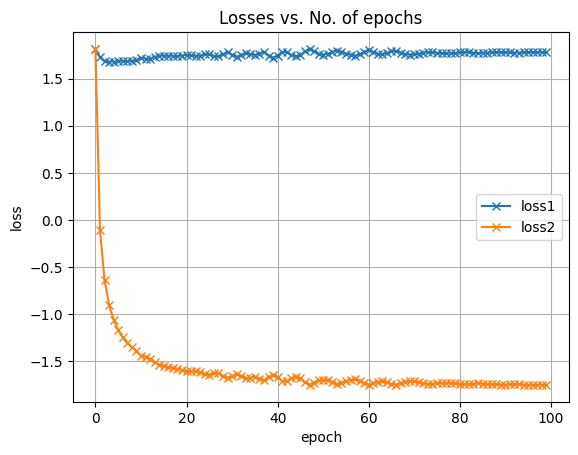

In [19]:
plot_history(history)

In [20]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model.pth")

## Testing

In [21]:
checkpoint = torch.load("model.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [22]:
results=testing(model,test_loader)

In [23]:
windows_labels=[]
for i in range(len(labels)-window_size):
    windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [24]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels ]

In [25]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

In [26]:
len(y_pred), len(y_test)

(17457, 17457)

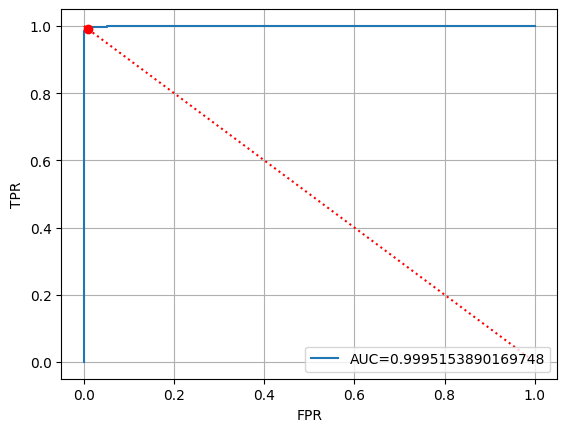

In [27]:
threshold=ROC(y_test,y_pred)

In [28]:
threshold

array([27.699364], dtype=float32)

In [29]:
y_pred_ = np.zeros(y_pred.shape[0])
y_pred_[y_pred >= threshold] = 1

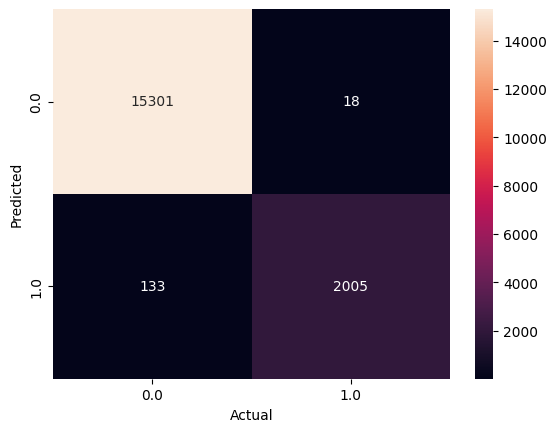

In [30]:
confusion_matrix(np.array(y_test), y_pred_)

In [31]:
threshold = 10
y_pred_ = np.zeros(y_pred.shape[0])
y_pred_[y_pred >= threshold] = 1

In [32]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15434
         1.0       0.87      1.00      0.93      2023

    accuracy                           0.98     17457
   macro avg       0.93      0.99      0.96     17457
weighted avg       0.98      0.98      0.98     17457



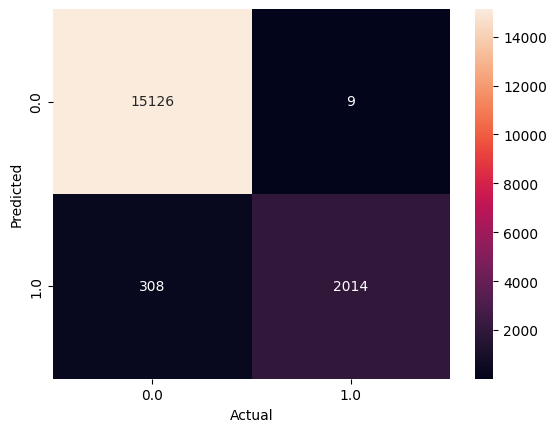

In [33]:
confusion_matrix(np.array(y_test), y_pred_)

In [34]:
with open(f'scores/usad_{file}_{train_size}_{window_size}.dat', 'w') as f:
    for i in range(len(y_pred)):
        f.write(str(y_pred[i]) + ';' + str(y_test[i]) + ';' + str(y_pred_[i])  + '\n')